In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

# Very hacky, bad thing to do.
SRC_PATH = os.path.realpath('../src')
sys.path.append(SRC_PATH)

In [3]:
# Local imports.
from analysis import single_cycles
from defaults import PITCH_RATE, SAMPLE_RATE
from synthesis import EnvelopeMorpher, StimulusGenerator
from util import midi_to_hz, time_plot, stft_plot

In [4]:
# Synthesis parameters.
num_partials = 70
midi_pitch = 48
fm_depth = 0.1314
f0 = midi_to_hz(midi_pitch)

In [5]:
# Load env as linear amplitude. (CheapTrick calculates the power spectrum.)
env = single_cycles[0]['env']
env = np.sqrt(env)

In [26]:
# Modify the spectral envelopes.

morpher = EnvelopeMorpher(env)
morpher.shuffle_phase(num_shifts=4)

# Check that the shuffler is working.
print(env - morpher())

[[ 1.13612357e-01  1.84052037e-02  0.00000000e+00 ...  4.07590565e-05
   4.96912905e-05  8.68709319e-05]
 [ 1.12561786e-01 -6.04935227e-02  0.00000000e+00 ...  2.02684291e-05
   1.54676908e-05  1.26248938e-05]
 [ 8.61363815e-02 -1.44952659e-01  0.00000000e+00 ...  2.28275406e-06
  -1.69741181e-06 -1.72573776e-05]
 ...
 [ 1.56857272e-01  2.65024771e-03  0.00000000e+00 ...  1.39649078e-04
   1.72044605e-04  1.20022280e-04]
 [ 1.50147156e-01  2.03417042e-03  0.00000000e+00 ...  1.17254260e-04
   1.34114902e-04  8.66172629e-05]
 [ 1.14409729e-01  1.00714015e-02  0.00000000e+00 ...  1.01913383e-05
   9.44148441e-06  1.78694788e-05]]


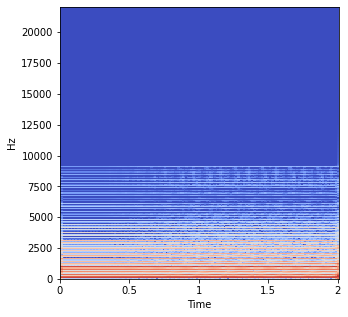

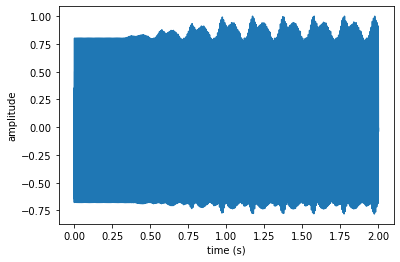

In [14]:
# Rock 'n' Roll.

generator = StimulusGenerator(sr=SAMPLE_RATE, pr=PITCH_RATE)

# FROZEN reconstruction condition.
x = generator(
    f0=f0,
    fm_depth=fm_depth*0,
    env=env,
    num_partials=70,
    length=2.,
    mod_rate=5.,
    mod_hold=0.3,
    mod_fade=0.7,
)

stft_plot(x)
time_plot(x)
display(ipd.Audio(x, rate=SAMPLE_RATE))

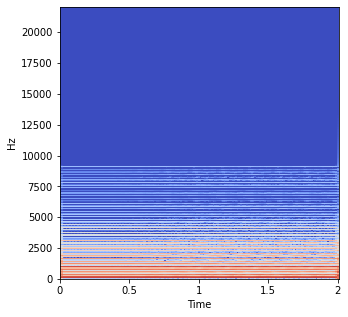

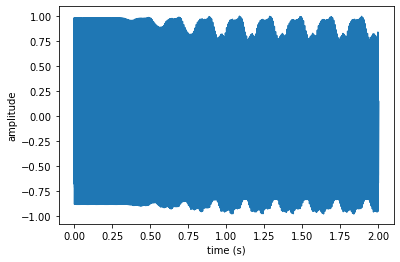

In [17]:
# Amplitude modulation phase-shuffled condition.

morpher.shuffle_phase(num_shifts=4)

x = generator(
    f0=f0,
    fm_depth=fm_depth*0,
    env=morpher(),
    num_partials=70,
    length=2.,
    mod_rate=5.,
    mod_hold=0.3,
    mod_fade=0.7,
)

stft_plot(x)
time_plot(x)
display(ipd.Audio(x, rate=SAMPLE_RATE))

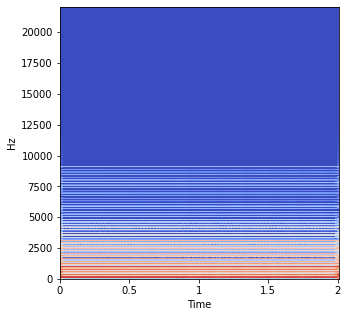

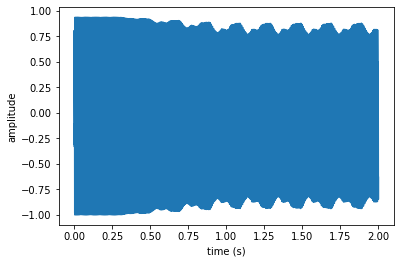

In [18]:
# PAM mode, pure amplitude modulation condition (a.k.a. tremolo).

x = generator(
    f0=f0,
    fm_depth=fm_depth*0,
    env=morpher(),
    num_partials=70,
    length=2.,
    mod_rate=5.,
    mod_hold=0.3,
    mod_fade=0.7,
    synth_mode='pam',
)

stft_plot(x)
time_plot(x)
display(ipd.Audio(x, rate=SAMPLE_RATE))